In [ ]:
from DBNets import DBNets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from DBNets import oofargo
from DBNets import preproc as pp
from scipy.ndimage import gaussian_filter

## Loading DBNets

In [2]:
dbnets = DBNets.DBNets(ensemble='finalRI')

Initializing DBNets


Loading the CNN ensemble: 100%|█████████████████| 50/50 [00:36<00:00,  1.37it/s]


## Loading GWLup image and smoothing it to the same resolution of training dataset

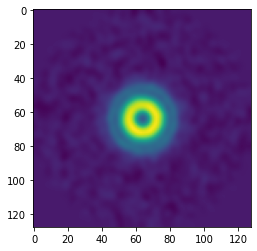

In [3]:
gwlup = np.load('../../../ppdisk_image_catalogue/npy_images/gwlup.npy')
paradiscs = pd.read_csv('../../../ppdisk_image_catalogue/data.csv')
gwlup = gaussian_filter(gwlup, 16*np.sqrt(0.125**2-0.04**2))
gwlup = (gwlup-gwlup.mean())/gwlup.std()
plt.imshow(gwlup)

In [4]:
paradiscs[paradiscs['Disk name']=='GW Lup']

,Disk name,log_age_min,log_age_max,class,gap id,fitsname,npyfilename,cx,cy,Semi Major axis [au],...,lodato_pred,kin,kin_ref,ALMA Band,Img Reference,Data reference,Mp_simu [Mj],sim references,Notes,Unnamed: 35
4,GW Lup,5.9,6.7,II,1.0,GWLup_continuum.fits,gwlup.npy,1501,1501,74.0,...,0.035,NaN,NaN,6,dsharp,Zhang2018,NaN,NaN,NaN,NaN


In [5]:
plain_res = dbnets.measure(gwlup)

Text(0, 0.5, 'pdf')

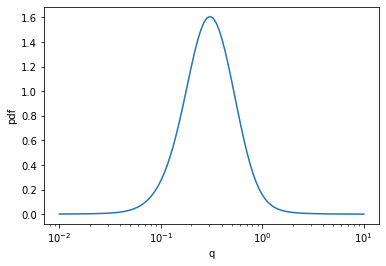

In [6]:
plain_res.summary_measure()
x = np.linspace(-2,1,100)
plt.plot(10**x, plain_res.pdf(x))
plt.xscale('log')
plt.xlabel('q')
plt.ylabel('pdf')

## Loading data for retraining

In [3]:
para = pd.read_csv('./params(1).csv')

In [4]:
data1500 = np.load('Simulazioni_1500.npy', allow_pickle=True).item()

In [5]:
data = np.array([(data1500[i]-data1500[i].mean())/(data1500[i].std()) for i in range(0,300)]).reshape(-1,128,128,1)

In [6]:
data = gaussian_filter(data,[ 0, 0.04*16, 0.04*16, 0])

In [7]:
gaussian_filter?

In [8]:
train_x = data[:200]
test_x = data[200:]
train_y = np.array(np.log10(para.loc[0:199, 'PlanetMass']))+3
test_y = np.array(np.log10(para.loc[200:300, 'PlanetMass']))+3

In [9]:
dbnets.finetune?

In [10]:
dbnets.finetune(train_x, train_y, test_x, test_y, 'realdata5', memory=0.2)

starting fine tuning


0it [00:00, ?it/s]

Epoch 1/20


2024-03-30 03:17:07.037031: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 351076352 exceeds 10% of free system memory.


84/84 [==============================] - 16s 175ms/step - loss: -0.3154 - val_loss: -1.3731
Epoch 2/20
84/84 [==============================] - 15s 174ms/step - loss: -0.3243 - val_loss: -1.3852
Epoch 3/20
84/84 [==============================] - 14s 171ms/step - loss: -0.3265 - val_loss: -1.4032
Epoch 4/20
84/84 [==============================] - 15s 174ms/step - loss: -0.3294 - val_loss: -1.4145
Epoch 5/20
84/84 [==============================] - 14s 170ms/step - loss: -0.3298 - val_loss: -1.4167
Epoch 6/20
84/84 [==============================] - 14s 167ms/step - loss: -0.3307 - val_loss: -1.4195
Epoch 7/20
84/84 [==============================] - 14s 166ms/step - loss: -0.3325 - val_loss: -1.4247
Epoch 8/20
84/84 [==============================] - 14s 167ms/step - loss: -0.3355 - val_loss: -1.4274
Epoch 9/20
84/84 [==============================] - 14s 167ms/step - loss: -0.3329 - val_loss: -1.4277
Epoch 10/20
84/84 [==============================] - 14s 168ms/step - loss: -0.3392 

2024-03-30 03:21:58.998222: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 337969152 exceeds 10% of free system memory.


INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata5/0.1/assets


INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata5/0.1/assets
1it [05:25, 325.80s/it]

Epoch 1/20


2024-03-30 03:22:27.002632: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 351076352 exceeds 10% of free system memory.


84/84 [==============================] - 15s 170ms/step - loss: -0.2484 - val_loss: -1.2674
Epoch 2/20
84/84 [==============================] - 14s 165ms/step - loss: -0.2578 - val_loss: -1.2726
Epoch 3/20
84/84 [==============================] - 14s 164ms/step - loss: -0.2657 - val_loss: -1.2606
Epoch 4/20
84/84 [==============================] - 14s 166ms/step - loss: -0.2715 - val_loss: -1.3361
Epoch 5/20
84/84 [==============================] - 14s 165ms/step - loss: -0.2766 - val_loss: -1.3330
Epoch 6/20
84/84 [==============================] - 14s 165ms/step - loss: -0.2775 - val_loss: -1.3660
Epoch 7/20
84/84 [==============================] - 14s 167ms/step - loss: -0.2809 - val_loss: -1.3782
Epoch 8/20
84/84 [==============================] - 14s 165ms/step - loss: -0.2819 - val_loss: -1.3866
Epoch 9/20
84/84 [==============================] - 14s 166ms/step - loss: -0.2809 - val_loss: -1.3571
Epoch 10/20
84/84 [==============================] - 14s 165ms/step - loss: -0.2849 

2024-03-30 03:27:09.872500: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 337969152 exceeds 10% of free system memory.


INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata5/0.2/assets


INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata5/0.2/assets
2it [10:34, 315.55s/it]

Epoch 1/20


2024-03-30 03:27:32.202502: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 351666176 exceeds 10% of free system memory.


84/84 [==============================] - 15s 171ms/step - loss: -0.3303 - val_loss: -1.2853
Epoch 2/20
84/84 [==============================] - 14s 166ms/step - loss: -0.3394 - val_loss: -1.3001
Epoch 3/20
84/84 [==============================] - 14s 163ms/step - loss: -0.3458 - val_loss: -1.3084
Epoch 4/20
84/84 [==============================] - 14s 165ms/step - loss: -0.3473 - val_loss: -1.3138
Epoch 5/20
84/84 [==============================] - 14s 165ms/step - loss: -0.3508 - val_loss: -1.3077
Epoch 6/20
84/84 [==============================] - 14s 165ms/step - loss: -0.3484 - val_loss: -1.3099
Epoch 7/20
84/84 [==============================] - 14s 163ms/step - loss: -0.3488 - val_loss: -1.3009
Epoch 8/20
84/84 [==============================] - 14s 165ms/step - loss: -0.3538 - val_loss: -1.2573
Epoch 9/20
84/84 [==============================] - 14s 165ms/step - loss: -0.3516 - val_loss: -1.2827
Epoch 10/20
84/84 [==============================] - 14s 165ms/step - loss: -0.3543 

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata5/0.3/assets
3it [15:40, 311.40s/it]

Epoch 1/20
84/84 [==============================] - 15s 169ms/step - loss: -0.2605 - val_loss: -1.2536
Epoch 2/20
84/84 [==============================] - 14s 162ms/step - loss: -0.2710 - val_loss: -1.2862
Epoch 3/20
84/84 [==============================] - 14s 163ms/step - loss: -0.2783 - val_loss: -1.2921
Epoch 4/20
84/84 [==============================] - 14s 163ms/step - loss: -0.2804 - val_loss: -1.3140
Epoch 5/20
84/84 [==============================] - 14s 163ms/step - loss: -0.2813 - val_loss: -1.2724
Epoch 6/20
84/84 [==============================] - 14s 163ms/step - loss: -0.2858 - val_loss: -1.3369
Epoch 7/20
84/84 [==============================] - 14s 164ms/step - loss: -0.2839 - val_loss: -1.3181
Epoch 8/20
84/84 [==============================] - 14s 163ms/step - loss: -0.2905 - val_loss: -1.3199
Epoch 9/20
84/84 [==============================] - 14s 163ms/step - loss: -0.2902 - val_loss: -1.3001
Epoch 10/20
84/84 [==============================] - 14s 163ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata5/0.4/assets
4it [20:46, 309.19s/it]

Epoch 1/20
84/84 [==============================] - 15s 169ms/step - loss: -0.3857 - val_loss: -1.2917
Epoch 2/20
84/84 [==============================] - 14s 165ms/step - loss: -0.3943 - val_loss: -1.3888
Epoch 3/20
84/84 [==============================] - 14s 163ms/step - loss: -0.3963 - val_loss: -1.4311
Epoch 4/20
84/84 [==============================] - 14s 163ms/step - loss: -0.3996 - val_loss: -1.4451
Epoch 5/20
84/84 [==============================] - 14s 163ms/step - loss: -0.4030 - val_loss: -1.4541
Epoch 6/20
84/84 [==============================] - 14s 164ms/step - loss: -0.4020 - val_loss: -1.4645
Epoch 7/20
84/84 [==============================] - 14s 165ms/step - loss: -0.4019 - val_loss: -1.4028
Epoch 8/20
84/84 [==============================] - 14s 164ms/step - loss: -0.4023 - val_loss: -1.4697
Epoch 9/20
84/84 [==============================] - 14s 163ms/step - loss: -0.4024 - val_loss: -1.5065
Epoch 10/20
84/84 [==============================] - 14s 164ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata5/0.5/assets
5it [25:55, 309.06s/it]

Epoch 1/20
84/84 [==============================] - 15s 169ms/step - loss: -0.3863 - val_loss: -1.4030
Epoch 2/20
84/84 [==============================] - 14s 164ms/step - loss: -0.3929 - val_loss: -1.4094
Epoch 3/20
84/84 [==============================] - 14s 165ms/step - loss: -0.3985 - val_loss: -1.4128
Epoch 4/20
84/84 [==============================] - 14s 164ms/step - loss: -0.3996 - val_loss: -1.4157
Epoch 5/20
84/84 [==============================] - 14s 163ms/step - loss: -0.3996 - val_loss: -1.4176
Epoch 6/20
84/84 [==============================] - 14s 166ms/step - loss: -0.4054 - val_loss: -1.4224
Epoch 7/20
84/84 [==============================] - 14s 165ms/step - loss: -0.4033 - val_loss: -1.4227
Epoch 8/20
84/84 [==============================] - 14s 166ms/step - loss: -0.4051 - val_loss: -1.4350
Epoch 9/20
84/84 [==============================] - 14s 165ms/step - loss: -0.4058 - val_loss: -1.3967
Epoch 10/20
84/84 [==============================] - 14s 165ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata5/1.1/assets
6it [31:06, 309.77s/it]

Epoch 1/20
84/84 [==============================] - 15s 171ms/step - loss: -0.3789 - val_loss: -1.4314
Epoch 2/20
84/84 [==============================] - 14s 164ms/step - loss: -0.3932 - val_loss: -1.4539
Epoch 3/20
84/84 [==============================] - 14s 163ms/step - loss: -0.3980 - val_loss: -1.4432
Epoch 4/20
84/84 [==============================] - 14s 165ms/step - loss: -0.3976 - val_loss: -1.4609
Epoch 5/20
84/84 [==============================] - 14s 164ms/step - loss: -0.4059 - val_loss: -1.4494
Epoch 6/20
84/84 [==============================] - 14s 166ms/step - loss: -0.4027 - val_loss: -1.4533
Epoch 7/20
84/84 [==============================] - 14s 165ms/step - loss: -0.4033 - val_loss: -1.4608
Epoch 8/20
84/84 [==============================] - 14s 167ms/step - loss: -0.4052 - val_loss: -1.4633
Epoch 9/20
84/84 [==============================] - 14s 167ms/step - loss: -0.4032 - val_loss: -1.4731
Epoch 10/20
84/84 [==============================] - 14s 167ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata5/1.2/assets
7it [36:22, 311.97s/it]

Epoch 1/20
84/84 [==============================] - 15s 171ms/step - loss: -0.3406 - val_loss: -1.3879
Epoch 2/20
84/84 [==============================] - 14s 165ms/step - loss: -0.3526 - val_loss: -1.3771
Epoch 3/20
84/84 [==============================] - 14s 164ms/step - loss: -0.3525 - val_loss: -1.3978
Epoch 4/20
84/84 [==============================] - 14s 166ms/step - loss: -0.3566 - val_loss: -1.3903
Epoch 5/20
84/84 [==============================] - 14s 164ms/step - loss: -0.3589 - val_loss: -1.4042
Epoch 6/20
84/84 [==============================] - 14s 164ms/step - loss: -0.3596 - val_loss: -1.4167
Epoch 7/20
84/84 [==============================] - 14s 163ms/step - loss: -0.3594 - val_loss: -1.4189
Epoch 8/20
84/84 [==============================] - 14s 164ms/step - loss: -0.3577 - val_loss: -1.4247
Epoch 9/20
84/84 [==============================] - 14s 165ms/step - loss: -0.3614 - val_loss: -1.4301
Epoch 10/20
84/84 [==============================] - 14s 165ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata5/1.3/assets
8it [41:40, 313.87s/it]

Epoch 1/20
84/84 [==============================] - 15s 170ms/step - loss: -0.3390 - val_loss: -1.3142
Epoch 2/20
84/84 [==============================] - 14s 164ms/step - loss: -0.3472 - val_loss: -1.3421
Epoch 3/20
84/84 [==============================] - 14s 165ms/step - loss: -0.3471 - val_loss: -1.3641
Epoch 4/20
84/84 [==============================] - 14s 163ms/step - loss: -0.3516 - val_loss: -1.3635
Epoch 5/20
84/84 [==============================] - 14s 164ms/step - loss: -0.3551 - val_loss: -1.3576
Epoch 6/20
84/84 [==============================] - 14s 164ms/step - loss: -0.3551 - val_loss: -1.3729
Epoch 7/20
84/84 [==============================] - 14s 165ms/step - loss: -0.3572 - val_loss: -1.3779
Epoch 8/20
84/84 [==============================] - 15s 174ms/step - loss: -0.3577 - val_loss: -1.3756
Epoch 9/20
84/84 [==============================] - 14s 162ms/step - loss: -0.3582 - val_loss: -1.3896
Epoch 10/20
84/84 [==============================] - 14s 162ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata5/1.4/assets
9it [46:56, 314.52s/it]

Epoch 1/20
84/84 [==============================] - 16s 176ms/step - loss: -0.3827 - val_loss: -1.4051
Epoch 2/20
84/84 [==============================] - 14s 164ms/step - loss: -0.3911 - val_loss: -1.4019
Epoch 3/20
84/84 [==============================] - 14s 166ms/step - loss: -0.3980 - val_loss: -1.3632
Epoch 4/20
84/84 [==============================] - 14s 165ms/step - loss: -0.3997 - val_loss: -1.4317
Epoch 5/20
84/84 [==============================] - 14s 165ms/step - loss: -0.3978 - val_loss: -1.4213
Epoch 6/20
84/84 [==============================] - 14s 164ms/step - loss: -0.4008 - val_loss: -1.4370
Epoch 7/20
84/84 [==============================] - 14s 164ms/step - loss: -0.4024 - val_loss: -1.4172
Epoch 8/20
84/84 [==============================] - 14s 165ms/step - loss: -0.4014 - val_loss: -1.4182
Epoch 9/20
84/84 [==============================] - 14s 166ms/step - loss: -0.4016 - val_loss: -1.4058
Epoch 10/20
84/84 [==============================] - 14s 163ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata5/1.5/assets
10it [52:14, 315.53s/it]

Epoch 1/20
84/84 [==============================] - 16s 173ms/step - loss: -0.3456 - val_loss: -1.4633
Epoch 2/20
84/84 [==============================] - 14s 165ms/step - loss: -0.3546 - val_loss: -1.4508
Epoch 3/20
84/84 [==============================] - 14s 166ms/step - loss: -0.3559 - val_loss: -1.4571
Epoch 4/20
84/84 [==============================] - 14s 164ms/step - loss: -0.3577 - val_loss: -1.4733
Epoch 5/20
84/84 [==============================] - 14s 167ms/step - loss: -0.3579 - val_loss: -1.4744
Epoch 6/20
84/84 [==============================] - 14s 166ms/step - loss: -0.3614 - val_loss: -1.4689
Epoch 7/20
84/84 [==============================] - 14s 166ms/step - loss: -0.3608 - val_loss: -1.4705
Epoch 8/20
84/84 [==============================] - 14s 166ms/step - loss: -0.3629 - val_loss: -1.4548
Epoch 9/20
84/84 [==============================] - 14s 165ms/step - loss: -0.3624 - val_loss: -1.4654
Epoch 10/20
84/84 [==============================] - 14s 167ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata5/2.1/assets
11it [57:32, 316.37s/it]

Epoch 1/20
84/84 [==============================] - 16s 174ms/step - loss: -0.3516 - val_loss: -1.3147
Epoch 2/20
84/84 [==============================] - 14s 167ms/step - loss: -0.3606 - val_loss: -1.3448
Epoch 3/20
84/84 [==============================] - 14s 167ms/step - loss: -0.3640 - val_loss: -1.3424
Epoch 4/20
84/84 [==============================] - 14s 169ms/step - loss: -0.3634 - val_loss: -1.3695
Epoch 5/20
84/84 [==============================] - 14s 167ms/step - loss: -0.3667 - val_loss: -1.3627
Epoch 6/20
84/84 [==============================] - 14s 165ms/step - loss: -0.3680 - val_loss: -1.3772
Epoch 7/20
84/84 [==============================] - 14s 166ms/step - loss: -0.3680 - val_loss: -1.3779
Epoch 8/20
84/84 [==============================] - 14s 167ms/step - loss: -0.3675 - val_loss: -1.3765
Epoch 9/20
84/84 [==============================] - 14s 166ms/step - loss: -0.3715 - val_loss: -1.3766
Epoch 10/20
84/84 [==============================] - 14s 166ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata5/2.2/assets
12it [1:02:57, 318.73s/it]

Epoch 1/20
84/84 [==============================] - 16s 174ms/step - loss: -0.3564 - val_loss: -1.3710
Epoch 2/20
84/84 [==============================] - 14s 168ms/step - loss: -0.3656 - val_loss: -1.3881
Epoch 3/20
84/84 [==============================] - 14s 166ms/step - loss: -0.3708 - val_loss: -1.3570
Epoch 4/20
84/84 [==============================] - 14s 165ms/step - loss: -0.3706 - val_loss: -1.3876
Epoch 5/20
84/84 [==============================] - 14s 167ms/step - loss: -0.3730 - val_loss: -1.3707
Epoch 6/20
84/84 [==============================] - 14s 166ms/step - loss: -0.3723 - val_loss: -1.4003
Epoch 7/20
84/84 [==============================] - 14s 165ms/step - loss: -0.3751 - val_loss: -1.3725
Epoch 8/20
84/84 [==============================] - 14s 167ms/step - loss: -0.3756 - val_loss: -1.3802
Epoch 9/20
84/84 [==============================] - 14s 166ms/step - loss: -0.3776 - val_loss: -1.3781
Epoch 10/20
84/84 [==============================] - 14s 166ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata5/2.3/assets
13it [1:08:23, 321.12s/it]

Epoch 1/20
84/84 [==============================] - 16s 173ms/step - loss: -0.3476 - val_loss: -1.3977
Epoch 2/20
84/84 [==============================] - 14s 166ms/step - loss: -0.3542 - val_loss: -1.4326
Epoch 3/20
84/84 [==============================] - 14s 167ms/step - loss: -0.3533 - val_loss: -1.4146
Epoch 4/20
84/84 [==============================] - 14s 168ms/step - loss: -0.3606 - val_loss: -1.4469
Epoch 5/20
84/84 [==============================] - 14s 167ms/step - loss: -0.3631 - val_loss: -1.4214
Epoch 6/20
84/84 [==============================] - 14s 166ms/step - loss: -0.3648 - val_loss: -1.4328
Epoch 7/20
84/84 [==============================] - 14s 166ms/step - loss: -0.3632 - val_loss: -1.4615
Epoch 8/20
84/84 [==============================] - 14s 166ms/step - loss: -0.3631 - val_loss: -1.4540
Epoch 9/20
84/84 [==============================] - 14s 165ms/step - loss: -0.3635 - val_loss: -1.4590
Epoch 10/20
84/84 [==============================] - 14s 166ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata5/2.4/assets
14it [1:13:50, 322.88s/it]

Epoch 1/20
84/84 [==============================] - 16s 171ms/step - loss: -0.3515 - val_loss: -1.3221
Epoch 2/20
84/84 [==============================] - 14s 166ms/step - loss: -0.3641 - val_loss: -1.3251
Epoch 3/20
84/84 [==============================] - 14s 165ms/step - loss: -0.3660 - val_loss: -1.3066
Epoch 4/20
84/84 [==============================] - 14s 164ms/step - loss: -0.3670 - val_loss: -1.3487
Epoch 5/20
84/84 [==============================] - 14s 164ms/step - loss: -0.3700 - val_loss: -1.3451
Epoch 6/20
84/84 [==============================] - 14s 164ms/step - loss: -0.3695 - val_loss: -1.3589
Epoch 7/20
84/84 [==============================] - 14s 163ms/step - loss: -0.3724 - val_loss: -1.3471
Epoch 8/20
84/84 [==============================] - 14s 164ms/step - loss: -0.3740 - val_loss: -1.3536
Epoch 9/20
84/84 [==============================] - 14s 163ms/step - loss: -0.3733 - val_loss: -1.3532
Epoch 10/20
84/84 [==============================] - 14s 163ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata5/2.5/assets
15it [1:19:14, 323.21s/it]

Epoch 1/20
84/84 [==============================] - 16s 176ms/step - loss: -0.3707 - val_loss: -1.3578
Epoch 2/20
84/84 [==============================] - 14s 165ms/step - loss: -0.3810 - val_loss: -1.3844
Epoch 3/20
84/84 [==============================] - 14s 163ms/step - loss: -0.3879 - val_loss: -1.3716
Epoch 4/20
84/84 [==============================] - 14s 162ms/step - loss: -0.3911 - val_loss: -1.3456
Epoch 5/20
84/84 [==============================] - 14s 163ms/step - loss: -0.3880 - val_loss: -1.3898
Epoch 6/20
84/84 [==============================] - 14s 162ms/step - loss: -0.3906 - val_loss: -1.3820
Epoch 7/20
84/84 [==============================] - 14s 163ms/step - loss: -0.3918 - val_loss: -1.4178
Epoch 8/20
84/84 [==============================] - 14s 163ms/step - loss: -0.3946 - val_loss: -1.4195
Epoch 9/20
84/84 [==============================] - 14s 164ms/step - loss: -0.3904 - val_loss: -1.4437
Epoch 10/20
84/84 [==============================] - 14s 163ms/step - los

INFO:tensorflow:Assets written to: /home/aleruzza/.local/lib/python3.10/site-packages/DBNets/training/../trained/realdata5/3.1/assets
16it [1:24:40, 323.96s/it]

Epoch 1/20
84/84 [==============================] - 16s 171ms/step - loss: -0.3413 - val_loss: -1.2691
Epoch 2/20
84/84 [==============================] - 14s 163ms/step - loss: -0.3523 - val_loss: -1.3005
Epoch 3/20
84/84 [==============================] - 14s 165ms/step - loss: -0.3578 - val_loss: -1.3079
Epoch 4/20
84/84 [==============================] - 14s 163ms/step - loss: -0.3606 - val_loss: -1.3318
Epoch 5/20
84/84 [==============================] - 14s 162ms/step - loss: -0.3602 - val_loss: -1.3351
Epoch 6/20
84/84 [==============================] - 14s 163ms/step - loss: -0.3576 - val_loss: -1.3551
Epoch 7/20
84/84 [==============================] - 14s 163ms/step - loss: -0.3631 - val_loss: -1.3853
Epoch 8/20
84/84 [==============================] - 14s 164ms/step - loss: -0.3664 - val_loss: -1.3979
Epoch 9/20
84/84 [==============================] - 14s 163ms/step - loss: -0.3649 - val_loss: -1.3973
Epoch 10/20
84/84 [==============================] - 14s 163ms/step - los

# Retrained result

In [ ]:
dbnets_ft = DBNets.DBNets(ensemble='realdata5')


In [12]:
res_ft = dbnets_ft.measure(gwlup)

In [15]:
res_ft.summary_measure()
x = np.linspace(-2,1,100)
plt.plot(10**x, plain_res.pdf(x), label='before fine tuning')
plt.plot(10**x, res_ft.pdf(x), label='after fine tuning')
plt.xscale('log')
plt.xlabel('q')
plt.ylabel('pdf')
plt.legend()

In [14]:
import os
import re
folders = os.listdir('/home/aleruzza/.local/lib/python3.10/site-packages/DBNets/trained/realdata4')
mod = np.array([np.array(f.split('.')).astype(int) for f in folders if re.compile('\d.\d').match(f)])
max_model = np.max(mod[:,0])
max_fold = np.max([m[1] for m in mod if m[0]==max_model])

5